<a href="https://colab.research.google.com/github/Harshavardhan88/ELEVATELABS-TASK4/blob/main/Untitled16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Install & Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_score, recall_score
)

# 2: Load and Inspect the Data

In [22]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 3:  Preprocess the Data

In [23]:
median_price = df['price'].median()
df['is_expensive'] = (df['price'] > median_price).astype(int)

df = df.drop('price', axis=1)

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('is_expensive', axis=1)
y = df_encoded['is_expensive']


# 4: Train/Test Split and Standardization

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5: Train Logistic Regression Model

In [25]:
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)


LogisticRegression()

# 6: Predict and Evaluate

In [26]:
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("\nROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[47  4]
 [12 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.92      0.79      0.85        58

    accuracy                           0.85       109
   macro avg       0.86      0.86      0.85       109
weighted avg       0.86      0.85      0.85       109


ROC-AUC Score: 0.9232589587559161


# 7: Plot ROC Curve

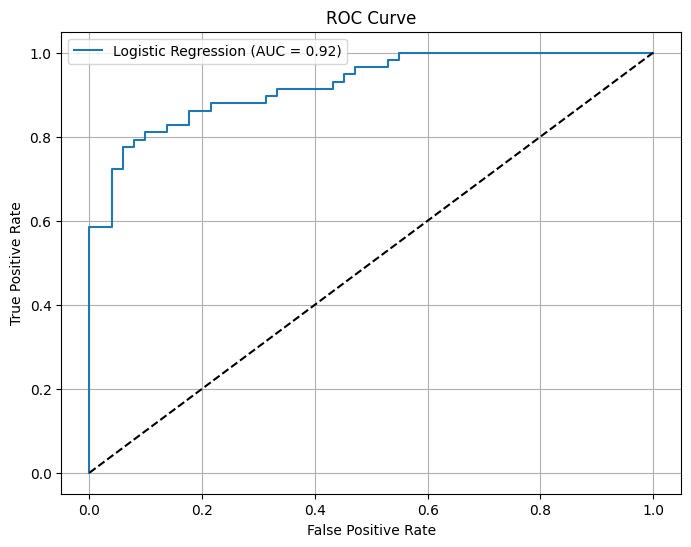

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


# 8: Threshold Tuning Code

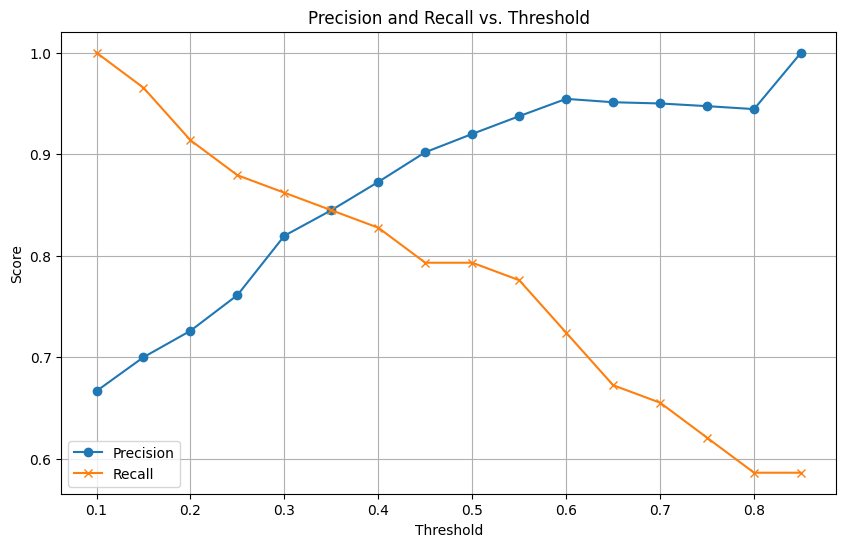

In [28]:
thresholds = np.arange(0.1, 0.9, 0.05)
precisions = []
recalls = []

for thresh in thresholds:
    y_thresh = (y_proba >= thresh).astype(int)
    precisions.append(precision_score(y_test, y_thresh))
    recalls.append(recall_score(y_test, y_thresh))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='x')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()
